In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import warnings
warnings.simplefilter('ignore')

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='count'>

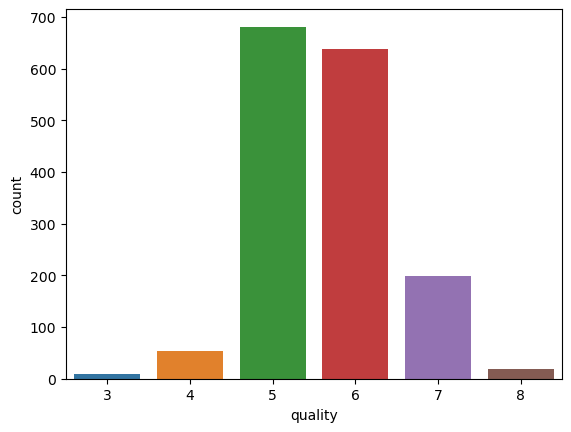

In [3]:
sns.countplot(x='quality', data=wine)

<AxesSubplot:>

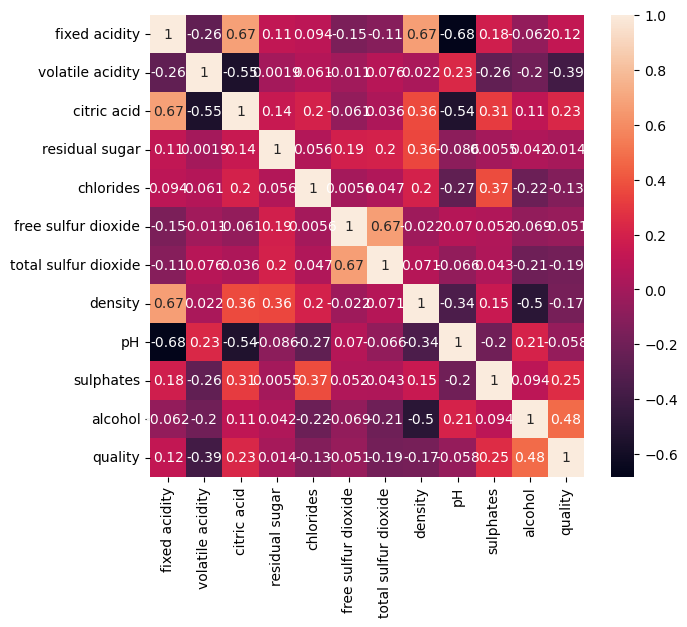

In [4]:
corr_matrix = wine.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True)

In [5]:
corr_matrix = wine.corr()
corr_with_target = abs(corr_matrix['quality']).sort_values(ascending=False)
best_features = corr_with_target[1:6].index.tolist()
print("Best features based on correlation analysis: ", best_features)

Best features based on correlation analysis:  ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']


In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
# create a list of feature columns
feature_cols = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']

# define X and y
X = wine[feature_cols]
y = wine.quality

#### Effect of depth on bias and variance

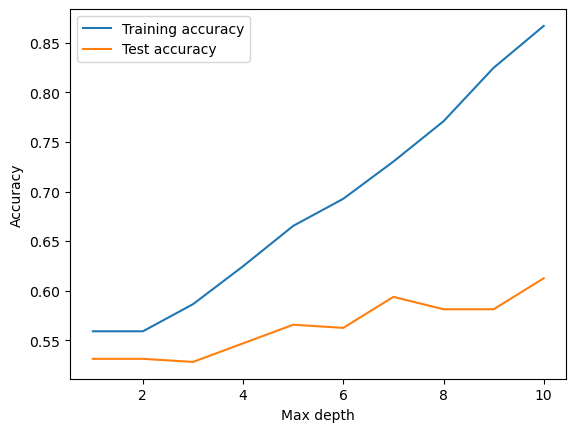

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of max_depth values to try
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Train a decision tree for each max_depth value and record the training and test accuracy
train_accuracies = []
test_accuracies = []
for max_depth in max_depth_list:
    # Create a decision tree with the specified max_depth
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)  
    # Train the decision tree on the training data
    dt.fit(X_train, y_train)
    # Evaluate the training accuracy
    train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    # Evaluate the test accuracy
    test_pred = dt.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)
# Plot the training and test accuracies as a function of max_depth
plt.plot(max_depth_list, train_accuracies, label='Training accuracy')
plt.plot(max_depth_list, test_accuracies, label='Test accuracy')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


One way to regularize the decision tree classifier is by setting the min_samples_leaf hyperparameter to a value greater than 1. This specifies the minimum number of samples required to be at a leaf node of the tree. By increasing this value, we can prevent the tree from growing too deep and overfitting the training data.

alcohol: 0.854680408049223
volatile acidity: 0.0
sulphates: 0.14531959195077704
citric acid: 0.0
total sulfur dioxide: 0.0


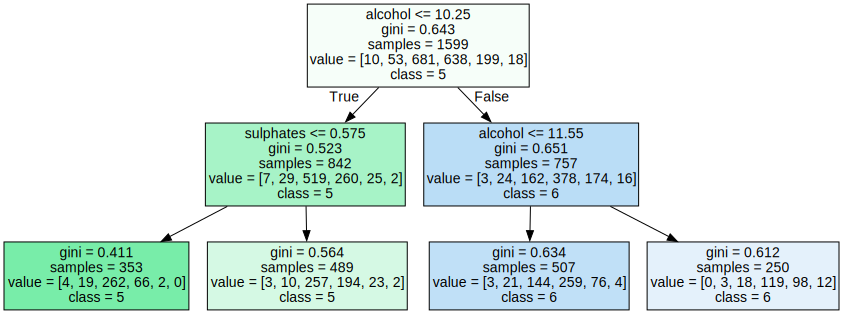

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
# train decision tree with max_depth=2
tree_depth_2 = DecisionTreeClassifier(max_depth=2,random_state=1)
tree_depth_2.fit(X, y)
# print feature importances
for name, importance in zip(feature_cols,tree_depth_2.feature_importances_):
    print(f"{name}: {importance}")
    
graph = Source(export_graphviz(tree_depth_2, out_file=None,
                               feature_names=feature_cols,
                               class_names=['3','4','5','6','7','8'],
                               filled=True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train decision tree with max_depth=2
tree_depth_2= DecisionTreeClassifier(max_depth=2,random_state=1)
tree_depth_2.fit(X_train, y_train)
y_pred = tree_depth_2.predict(X_test)
# accuracy on the testing set
accuracy = tree_depth_2.score(X_test, y_test)
print("Accuracy:", accuracy)
# generate classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.59375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.63      0.78      0.69       140
           6       0.55      0.60      0.58       134
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00         2

    accuracy                           0.59       320
   macro avg       0.20      0.23      0.21       320
weighted avg       0.51      0.59      0.55       320



alcohol: 0.4701451258266833
volatile acidity: 0.10130562881723514
sulphates: 0.20798219808634727
citric acid: 0.018271224911649526
total sulfur dioxide: 0.2022958223580848


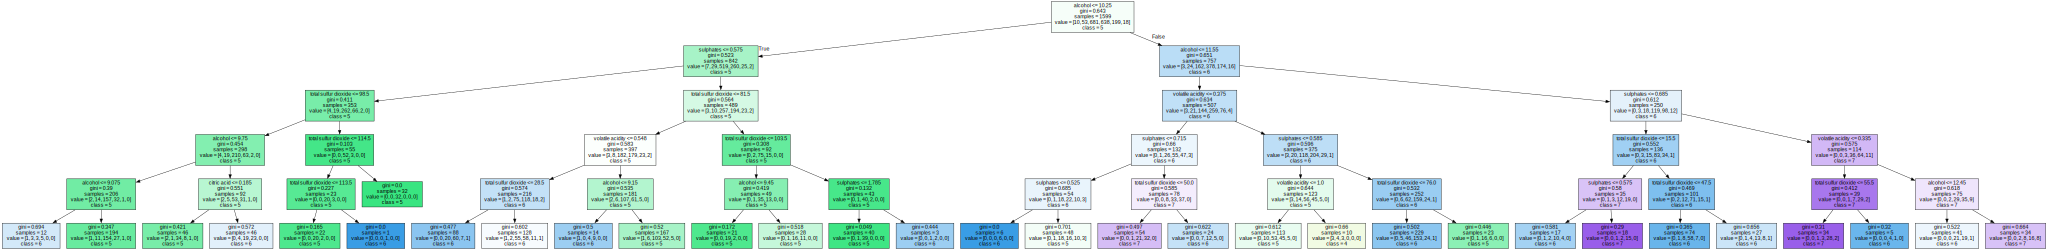

In [12]:
# create a decision tree classifier with max_depth=5
tree_depth_5 = DecisionTreeClassifier(max_depth=5)
tree_depth_5.fit(X, y)

for name, importance in zip(feature_cols,tree_depth_5.feature_importances_):
    print(f"{name}: {importance}")
    
# generate the Graphviz representation of the decision tree
graph5 = Source(export_graphviz(tree_depth_5, out_file=None,
                               feature_names=feature_cols,
                               class_names=['3','4','5','6','7','8'],
                               filled=True)) 
svg5 = SVG(graph5.pipe(format='svg'))
display(svg5)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train decision tree with max_depth=2
tree_depth_5 = DecisionTreeClassifier(max_depth=5,random_state=1)
tree_depth_5.fit(X_train, y_train)
y_pred = tree_depth_5.predict(X_test)
# accuracy on the testing set
accuracy = tree_depth_5.score(X_test, y_test)
print("Accuracy:", accuracy)
# generate classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.5875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.62      0.74      0.68       140
           6       0.60      0.54      0.57       134
           7       0.41      0.40      0.41        30
           8       0.00      0.00      0.00         2

    accuracy                           0.59       320
   macro avg       0.27      0.28      0.28       320
weighted avg       0.56      0.59      0.57       320



#### hyperparameters

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2, 3, 5],
              'min_samples_leaf': [2, 5, 7, 10],
              'max_leaf_nodes': [None, 5, 7, 10]}
tree = DecisionTreeClassifier(random_state=1)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 5}


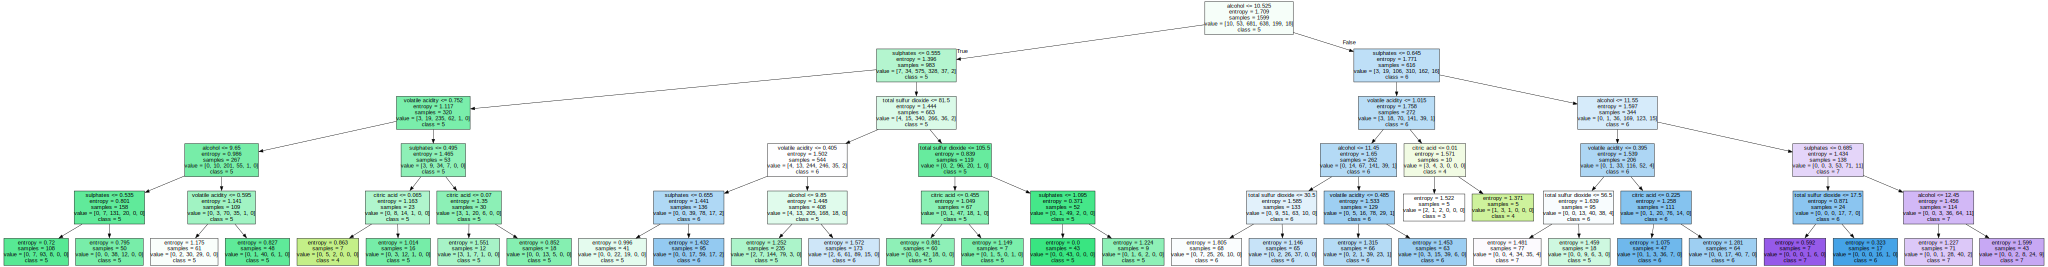

In [15]:
# create a decision tree classifier with max_depth=5
best_params = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_leaf_nodes= None ,min_samples_leaf=5,random_state=1)
best_params.fit(X, y)

# generate the Graphviz representation of the decision tree
best_tree = Source(export_graphviz(best_params, out_file=None,
                               feature_names=feature_cols,
                               class_names=['3','4','5','6','7','8'],
                               filled=True)) 
best_tree = SVG(best_tree.pipe(format='svg'))
display(best_tree)

In [16]:
best_tree_metrics= DecisionTreeClassifier(criterion='entropy',max_depth=5,max_leaf_nodes= None ,min_samples_leaf=5,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
best_tree_metrics.fit(X_train, y_train)
accuracy = best_tree_metrics.score(X_test, y_test)
print("Accuracy:", accuracy)
y_pred = best_tree_metrics.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.59375
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.66      0.68      0.67       140
           6       0.57      0.59      0.58       134
           7       0.41      0.53      0.46        30
           8       0.00      0.00      0.00         2

    accuracy                           0.59       320
   macro avg       0.27      0.30      0.29       320
weighted avg       0.57      0.59      0.58       320



#### Approach2

In [17]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df['quality'] = df['quality'].apply(lambda x : 0 if x <=5 else 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


<AxesSubplot:xlabel='quality', ylabel='count'>

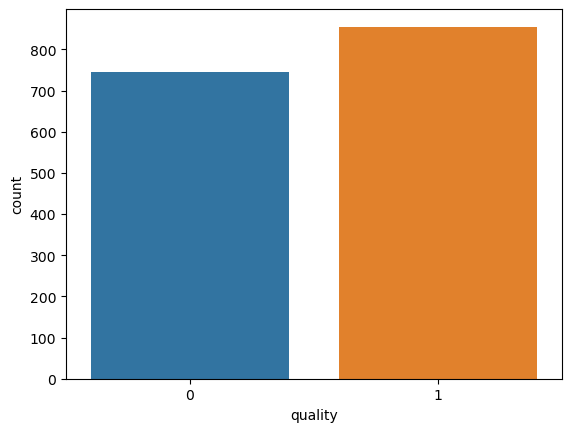

In [19]:
sns.countplot(x='quality', data=df)

In [20]:
corr_matrix = df.corr()
corr_with_target = abs(corr_matrix['quality']).sort_values(ascending=False)
best_features = corr_with_target[1:6].index.tolist()
print("Best features based on correlation analysis: ", best_features)

Best features based on correlation analysis:  ['alcohol', 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'citric acid']


In [21]:
# create a list of feature columns
feature_cols = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']

# define X and y
X = df[feature_cols]
y = df.quality

alcohol: 0.8534468516082325
volatile acidity: 0.0
sulphates: 0.14655314839176745
citric acid: 0.0
total sulfur dioxide: 0.0


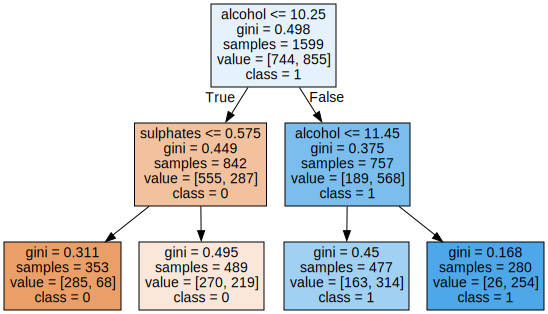

In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
# train decision tree with max_depth=2
tree_depth_2_binary= DecisionTreeClassifier(max_depth=2,random_state=1)
tree_depth_2_binary.fit(X, y)
# print feature importances
for name, importance in zip(feature_cols, tree_depth_2_binary.feature_importances_):
    print(f"{name}: {importance}")
    
graph = Source(export_graphviz(tree_depth_2_binary, out_file=None,
                               feature_names=feature_cols,
                               class_names=['0','1'],#'3', '4', '5', '6', '7', '8'],
                               filled=True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train decision tree with max_depth=2
tree_depth_2_binary = DecisionTreeClassifier(max_depth=2,random_state=1)
tree_depth_2_binary.fit(X_train, y_train)
# accuracy on the testing set
accuracy = tree_depth_2_binary.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.70625


alcohol: 0.5091813094225128
volatile acidity: 0.09609707716101944
sulphates: 0.22966563969990947
citric acid: 0.02057261994318562
total sulfur dioxide: 0.14448335377337274


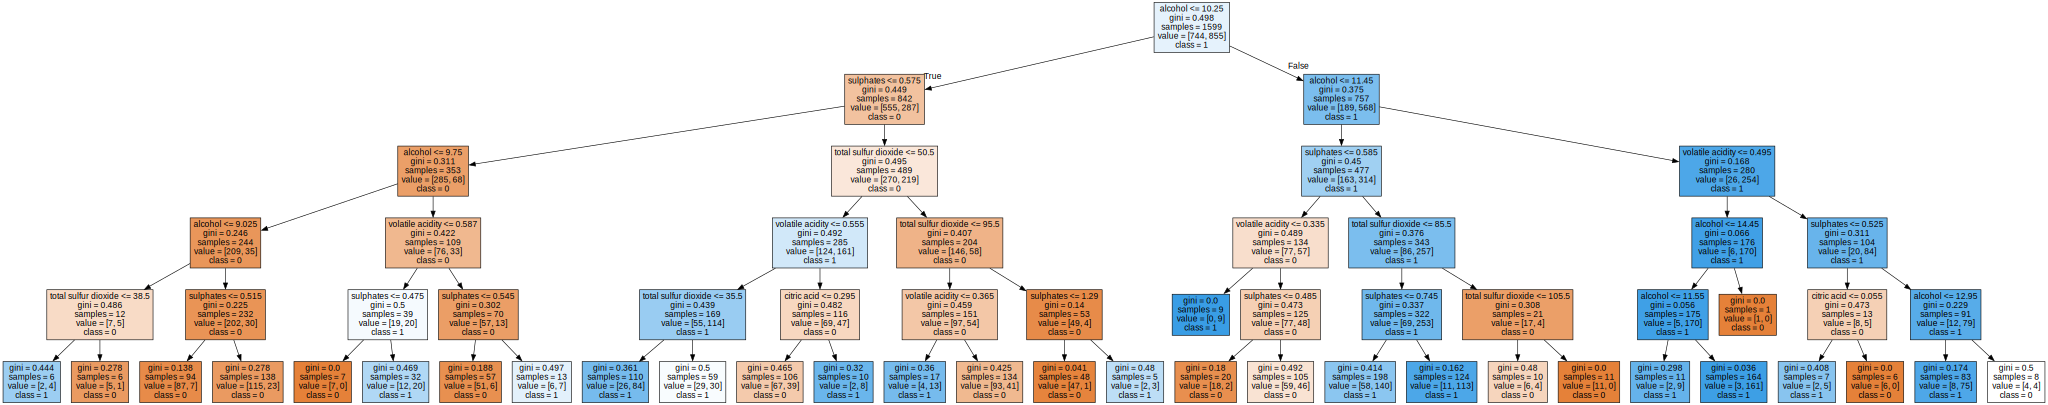

In [24]:
# create a decision tree classifier with max_depth=5
tree_depth_5_binary = DecisionTreeClassifier(max_depth=5,random_state=1)
tree_depth_5_binary.fit(X, y)

for name, importance in zip(feature_cols,tree_depth_5_binary.feature_importances_):
    print(f"{name}: {importance}")
    
# generate the Graphviz representation of the decision tree
graph5 = Source(export_graphviz(tree_depth_5_binary, out_file=None,
                               feature_names=feature_cols,
                               class_names=['0', '1'],
                               filled=True)) 
svg5 = SVG(graph5.pipe(format='svg'))
display(svg5)
# graph5.render('wine_quality_tree5', format='png', view=True)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train decision tree with max_depth=5
tree_depth_5_binary = DecisionTreeClassifier(max_depth=5)
tree_depth_5_binary.fit(X_train, y_train)
# y_pred = tree5.predict(X_test)
# accuracy on the testing set
accuracy = tree_depth_5_binary.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.746875


As we can see, the decision tree with max_depth=2 has only 3 levels of splits, while the decision tree with max_depth=5 has 6 levels of splits. The depth of the tree controls the bias-variance trade-off. A tree with a small depth will have high bias and low variance, while a tree with a large depth will have low bias and high variance. In other words, a shallow tree is more likely to underfit the data, while a deep tree is more likely to overfit the data.

The algorithm chooses the attribute to split on based on the information gain. At a given tree level, different nodes may split on different attributes, depending on which attribute provides the most information gain. For example, in the decision tree with max_depth=5, at level 3, the node on the left splits on "total sulfur dioxide", while the node on the right splits on "volatile acidity". This is because "total sulfur dioxide" provides the most information gain for the left node, while "volatile acidity" provides the most information gain for the right node

The depth of a decision tree can have a significant impact on the bias and variance of the model. As the depth of the tree increases, the model becomes more complex and can fit the training data more closely, reducing bias. However, this can also increase the variance of the model, making it more likely to overfit the data and perform poorly on new, unseen data.

In the given code, two decision trees are created with different depths: one with a max_depth of 2 and another with a max_depth of 5. The decision tree with a max_depth of 2 is less complex and has higher bias but lower variance than the one with a max_depth of 5, which is more complex and has lower bias but higher variance.

Regarding the choices the algorithm makes in which attributes to split on, it depends on the specific algorithm and the data. In general, decision tree algorithms aim to split on the attributes that provide the most information gain or reduce the most impurity in the target variable. At each tree level, different nodes may split on different attributes, depending on which attribute provides the most information gain or impurity reduction at that particular level.

#### Neural Networks

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [27]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [28]:
X = df.drop(['quality'],axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    

In [30]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [31]:
df.quality.unique()

array([0, 1])

In [32]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(2, 2),(5, 5), (10, 10), (15, 15, 15), (30, 30),(30, 30, 15)]
}

# Initialize the MLPClassifier model
mlp = MLPClassifier(max_iter=10000)

# Perform grid search with cross-validation
grid = GridSearchCV(mlp, param_grid, cv=5)
grid.fit(X_train, y_train)

# Get the results and print the top 3 configurations
results = grid.cv_results_
scores = results['mean_test_score']
best_scores_idx = scores.argsort()[-3:][::-1]
for i in range(3):
    idx = best_scores_idx[i]
    print("Configuration ", i+1, ":")
    print("Parameters:", results['params'][idx])
    print("")

# Use the best configuration to initialize the MLPClassifier model
best_config = results['params'][best_scores_idx[0]]
best_mlp = MLPClassifier(max_iter=10000, **best_config)
best_mlp.fit(X_train, y_train)


Configuration  1 :
Parameters: {'hidden_layer_sizes': (30, 30)}

Configuration  2 :
Parameters: {'hidden_layer_sizes': (30, 30, 15)}

Configuration  3 :
Parameters: {'hidden_layer_sizes': (15, 15, 15)}



MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=10000)

In [34]:
nn1 = MLPClassifier(hidden_layer_sizes=(2, 2),max_iter=500)
nn1.fit(X_train,y_train)
predictions = nn1.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[131  53]
 [ 63 153]]


In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       184
           1       0.74      0.71      0.73       216

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



In [36]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(nn1.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(nn1.coefs_)):
    m = len(nn1.coefs_[l])
    n = len(nn1.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)
print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(nn1.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(nn1.intercepts_[l]) for l,_ in enumerate(nn1.intercepts_)]))


This dataset has 11 input nodes and 2 output node(s)
There are 3 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 11x2 (11 nodes feeding into a layer of 2 nodes)
  1: 2x2 (2 nodes feeding into a layer of 2 nodes)
  2: 2x1 (2 nodes feeding into a layer of 1 nodes)

There are 3 1D arrays of intercepts, one for each layer
Each layer has [2, 2, 1] intercepts, one for each node


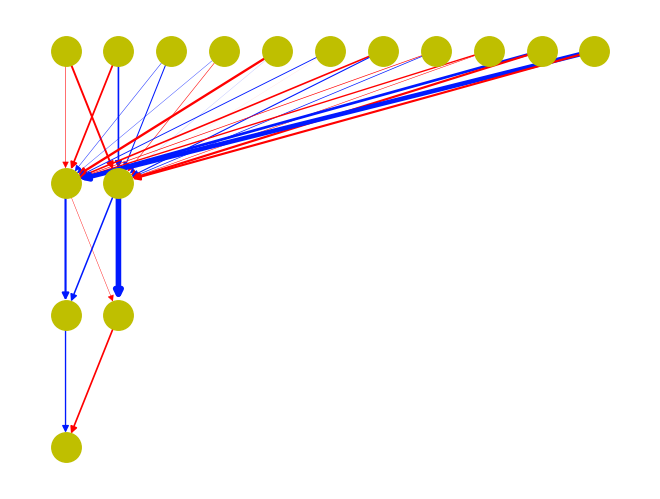

In [37]:
show_ann(nn1)

In [38]:
nn2 = MLPClassifier(hidden_layer_sizes=(15, 15, 15),max_iter=10000)
nn2.fit(X_train,y_train)
predictions = nn2.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[132  52]
 [ 47 169]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       184
           1       0.76      0.78      0.77       216

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



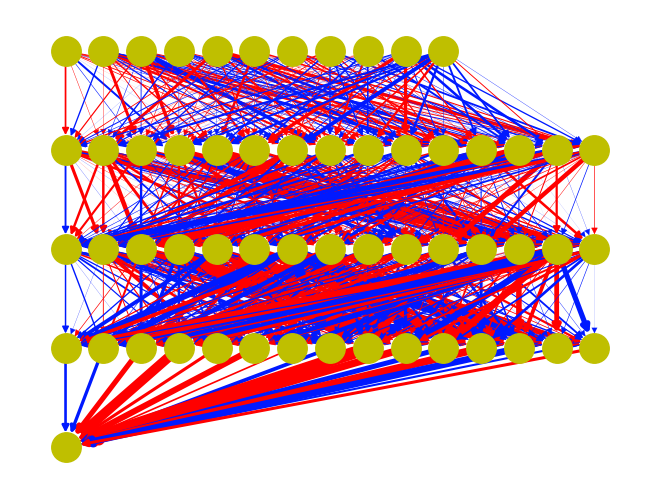

In [40]:
show_ann(nn2)

In [41]:
nn3 = MLPClassifier(hidden_layer_sizes=(30, 30, 15),max_iter=10000)
nn3.fit(X_train,y_train)
predictions = nn3.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[119  65]
 [ 40 176]]


In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       184
           1       0.73      0.81      0.77       216

    accuracy                           0.74       400
   macro avg       0.74      0.73      0.73       400
weighted avg       0.74      0.74      0.74       400



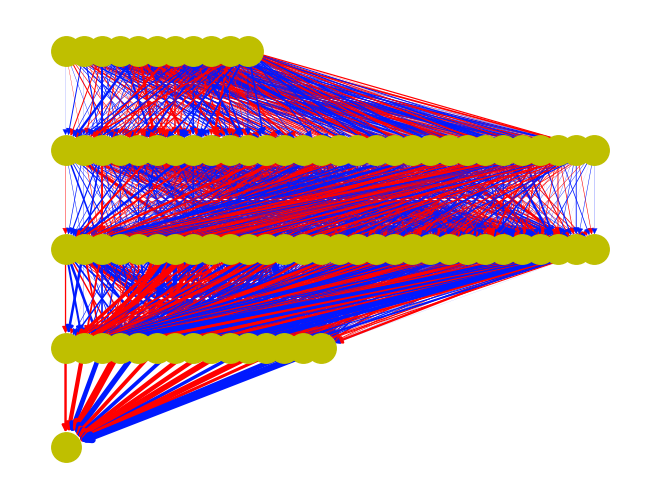

In [43]:
show_ann(nn3)

In [44]:
nn4 = MLPClassifier(hidden_layer_sizes=(30, 30),max_iter=10000)
nn4.fit(X_train,y_train)
predictions = nn1.predict(X_test)
print(confusion_matrix(y_test, predictions))

[[131  53]
 [ 63 153]]


In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       184
           1       0.74      0.71      0.73       216

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



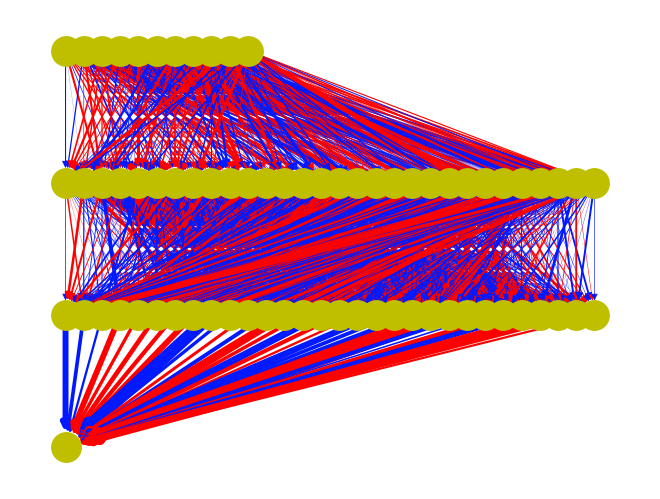

In [46]:
show_ann(nn4)